# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-264-gcc849a60 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10007MiB)


Setup complete ✅ (24 CPUs, 125.7 GB RAM, 421.6/937.3 GB disk)


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

### Detect Unquantized

In [ ]:
!python3 detect.py --cfg models/lpyolo.yaml --weights experiment_models/lpyolo.pt --img 640 --conf 0.25 --source data/images/zidane.jpg

### Detect Quantized

In [2]:
!python3 detect.py --cfg models/lpyolo_quant.yaml --weights experiment_models/lpyolo_W4A4.pt --img 640 --conf 0.25 --source data/images/zidane.jpg

detect: weights=['experiment_models/lpyolo_W4A4.pt'], source=data/images/zidane.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, cfg=models/lpyolo_quant.yaml, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-264-gcc849a60 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10007MiB)

Overriding model.yaml nc=7 with nc=20
Channels [3]

                 from  n    params  module                                  arguments                     
  0                -1  1       233  models.common.QuantConv                 [3, 8, 3, 1, None, 4, 4, False]
  1                -1  1         0  brevitas.nn.quant_max_pool.QuantMaxPool2d[2, 2, 0]                

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

### Validate Unquantized

In [6]:
!python3 val.py --weights experiment_models/lpyolo_coco_anchors_unnorm.pt --data VOC.yaml --img 640 --half

val: data=/home/omar/quant_yolov5/data/VOC.yaml, weights=['experiment_models/lpyolo_coco_anchors_unnorm.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-264-gcc849a60 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10007MiB)

Channels [3]

                 from  n    params  module                                  arguments                     
  0                -1  1       233  models.common.QuantConv                 [3, 8, 3, 1, None, 4, 4, False]
  1                -1  1         0  brevitas.nn.quant_max_pool.QuantMaxPool2d[2, 2, 0]                     
  2                -1  1       593  models.common.QuantConv                 [8, 8, 3, 1, None, 4, 4]      
  3                -1  1         0  brevitas.nn.quant_max

### Validate Quantized

In [ ]:
!python3 val.py --weights experiment_models/lpyolo_W4A4.pt --data VOC.yaml --img 640 --half

# 3. Train

### Train Unquantized

In [ ]:
!python3 train.py --img 640 --batch 64 --epochs 1 --data coco128.yaml --weights '' --cache --cfg models/yolov5s.yaml --classes 20 --optimizer Adam

### Train Quantized (QAT)

In [6]:
!python3 train.py --img 640 --batch 32 --epochs 50 --data coco128.yaml --weights experiment_models/lpyolo_coco_anchors_unnorm.pt --cache --cfg models/lpyolo_quant.yaml --classes 7 --optimizer SGD

train: weights=experiment_models/lpyolo_coco_anchors_unnorm.pt, cfg=models/lpyolo_quant.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, classes=7, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use 'git pull ultralytics master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-264-gcc849a60 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10007MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0

# Inference Pretrained Model

YOLOv5 🚀 v7.0-264-gcc849a60 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10007MiB)

Channels [3]

                 from  n    params  module                                  arguments                     
  0                -1  1       232  models.common.Conv                      [3, 8, 3, 1]                  
  1                -1  1         0  torch.nn.modules.pooling.MaxPool2d      [2, 2, 0]                     
  2                -1  1       592  models.common.Conv                      [8, 8, 3, 1]                  
  3                -1  1         0  torch.nn.modules.pooling.MaxPool2d      [2, 2, 0]                     
  4                -1  1      1184  models.common.Conv                      [8, 16, 3, 1]                 
  5                -1  1         0  torch.nn.modules.pooling.MaxPool2d      [2, 2, 0]                     
  6                -1  1      4672  models.common.Conv                      [16, 32, 3, 1]                
  7                -1  1 

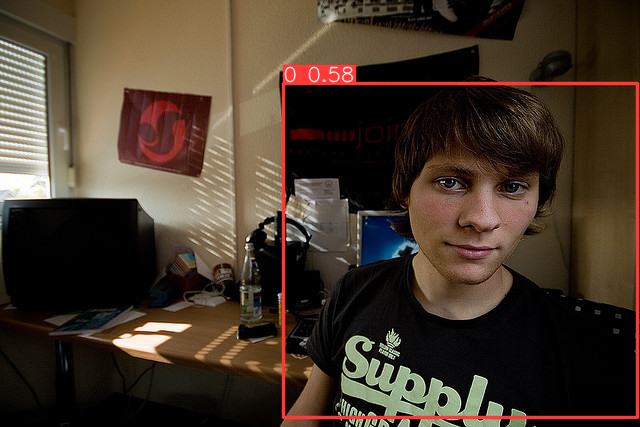

In [4]:
import torch

model_pre = torch.hub.load('.',
                      'custom',
                      'experiment_models/lpyolo_coco_anchors_unnorm.pt',
                       source='local',
                       classes = 7,
                       cfg = "models/lpyolo.yaml",
                       force_reload=True
                      )

im = '/home/omar/datasets/coco128/images/train2017/000000579736.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model_pre(im)  # inference
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

# Inference Quantized Model (QAT)

YOLOv5 🚀 v7.0-264-gcc849a60 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10007MiB)

Channels [3]

                 from  n    params  module                                  arguments                     
  0                -1  1       233  models.common.QuantConv                 [3, 8, 3, 1, None, 4, 4, False]
  1                -1  1         0  brevitas.nn.quant_max_pool.QuantMaxPool2d[2, 2, 0]                     
  2                -1  1       593  models.common.QuantConv                 [8, 8, 3, 1, None, 4, 4]      
  3                -1  1         0  brevitas.nn.quant_max_pool.QuantMaxPool2d[2, 2, 0]                     
  4                -1  1      1185  models.common.QuantConv                 [8, 16, 3, 1, None, 4, 4]     
  5                -1  1         0  brevitas.nn.quant_max_pool.QuantMaxPool2d[2, 2, 0]                     
  6                -1  1      4673  models.common.QuantConv                 [16, 32, 3, 1, None, 4, 4]    
  7                -1

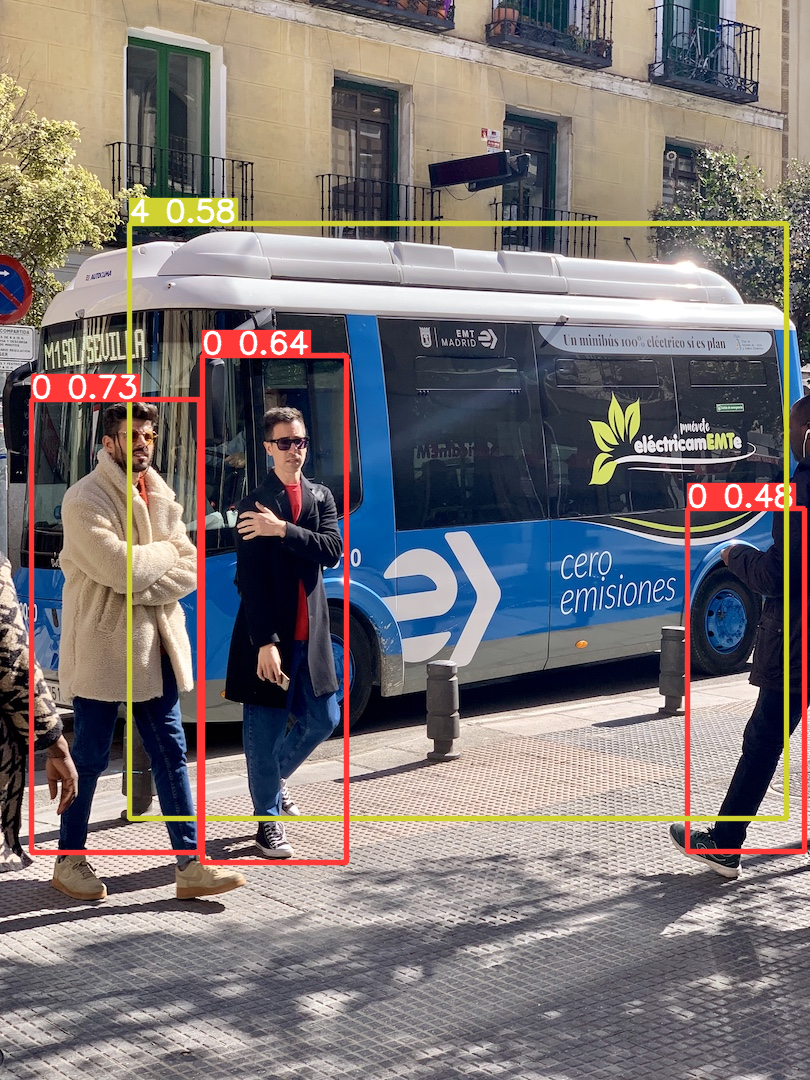

In [3]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model_q = torch.hub.load('.',
                       'custom',
                       'experiment_models/lpyolo_W4A4.pt',
                       source='local',
                       classes = 7,
                       force_reload=True,
                       cfg = "models/lpyolo_quant.yaml",
                      )
im = 'https://ultralytics.com/images/bus.jpg'
#im = '/home/omar/datasets/coco128/images/train2017/000000000338.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model_q(im)  # inference
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

## Save Model

In [2]:
from brevitas.export import export_brevitas_onnx
import torch

IN_CH = 384
OUT_CH = 640
BATCH_SIZE = 1

model_no_detect = torch.nn.Sequential(*[model_q.model.model.model[i] for i in range(15)])

path = 'experiment_models/lpyoloW4A4_quant.onnx'
inp = torch.randn(BATCH_SIZE,3, IN_CH, OUT_CH).cuda()

detection_model = model_no_detect
detection_model.cuda()
detection_model.eval()

exported_model = export_brevitas_onnx(detection_model, inp, path)

detect_module = model_q.model.model.model[15]
torch.save(detect_module.state_dict(), 'experiment_models/detect_module.pt')

# Visualizing Quantized Weights

In [8]:
import cv2
import numpy as np
from models.yolo import Detect
from utils.general import non_max_suppression
from utils.dataloaders import letterbox
from matplotlib import pyplot as plt
%matplotlib inline

nc = 7
anchors = np.array([[10, 13, 16, 30, 33, 23], [81, 82, 135, 169, 344, 319], [116, 90, 156, 198, 373, 326]])
detect_head = Detect(nc, anchors,ch=[36,36,36],do_quant=False,inplace=True)
detect_head.load_state_dict(torch.load("experiment_models/detect_module.pt"))
detect_head.cuda()
detect_head.eval()
detect_head.training = False
detect_head.stride = [32,32,32]


image = cv2.imread("data/images/zidane.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = letterbox(image, (384,640), auto=False)[0]
# image = image/255
image = image.astype(np.uint8)
image = np.expand_dims(image, 0)
image = np.transpose(image, (0,3,1,2))
image = torch.from_numpy(image).to("cuda").float()


# plt.imshow(image[0])
# plt.axis('off')
# plt.show()

model_no_detect.eval().cuda()
model_no_detect_out = model_no_detect(image).value.detach().to("cuda")
#print(model_no_detect_out,model_no_detect_out.shape)

pred = detect_head([model_no_detect_out,model_no_detect_out,model_no_detect_out])
print(pred[0].shape)
pred = pred[0].detach()

detections = non_max_suppression(pred,conf_thres = 0.30, iou_thres=0.45)
print(detections)


torch.Size([1, 2160, 12])
[tensor([[362.64636,  61.85144, 549.54541, 379.66293,   0.69579,   0.00000],
        [479.59976,  58.31227, 641.74988, 360.57117,   0.67412,   0.00000]], device='cuda:0')]


# Test Detect seperated model

In [3]:
detect_head.m[0](model_no_detect_out).shape

NameError: name 'detect_head' is not defined

In [ ]:

torch.save(detect_module.state_dict(), "detect.pt")

In [ ]:
model_q.model.model.model[15].m[0].weight.data

In [ ]:
model_no_detect[0].conv.out_channels

In [ ]:
model_q.model.model.model[15].conv.int_weight()

In [ ]:
model_q.model.model.model[15].m[0].quant_bias()

# Clean Coco Data

In [ ]:
import os

def count_files_in_directory(directory_path):
    # Get the list of files in the directory
    files = os.listdir(directory_path)

    # Count the number of files
    file_count = len(files)

    return file_count


train_img_path = "../datasets/coco128/images/train2017"  
train_label_path = "../datasets/coco128/labels/train2017" 
train_img_dir = os.listdir(train_img_path)
train_label_dir = os.listdir(train_label_path)

val_img_path = "../datasets/coco128/images/val2017"  
val_label_path = "../datasets/coco128/labels/val2017" 
val_img_dir = os.listdir(val_img_path)
val_label_dir = os.listdir(val_label_path)

In [ ]:
train_img_len = count_files_in_directory(train_img_path)
train_label_len = count_files_in_directory(train_label_path)

val_img_len = count_files_in_directory(val_img_path)
val_label_len = count_files_in_directory(val_label_path)

print(train_img_len, train_label_len)
print(val_img_len, val_label_len)

train_img_files = [img_path.replace(".jpg",".txt") for img_path in train_img_dir]

train_imgs_to_delete = list(set(train_img_files) ^ set(train_label_dir))
train_imgs_to_delete = [img_path.replace(".txt",".jpg") for img_path in train_imgs_to_delete]

for train_img_to_delete in train_imgs_to_delete:
    path = train_img_path + "/" + train_img_to_delete
    if os.path.exists(path):
        os.remove(path)
    
print(len(os.listdir(train_img_path)))

val_img_files = [img_path.replace(".jpg",".txt") for img_path in val_img_dir]

val_imgs_to_delete = list(set(val_img_files) ^ set(val_label_dir))
val_imgs_to_delete = [img_path.replace(".txt",".jpg") for img_path in val_imgs_to_delete]

for val_img_to_delete in val_imgs_to_delete:
    path = val_img_path + "/" + val_img_to_delete
    if os.path.exists(path):
        os.remove(path)
    
print(len(os.listdir(val_img_path)))

In [ ]:
import cv2
from matplotlib import pyplot as plt

idx = 2

image_path = val_img_dir[idx]
print(image_path)
print(train_img_path)

img = cv2.imread(val_img_path + "/" + image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(380,640))

plt.imshow(img)
plt.show()

In [ ]:
label_path = val_label_path + "/000000177934.txt"
with open(label_path, 'r') as file:
    # Read the content of the file
    file_content = file.read()

    # Print the content
    print(file_content)

# Clean VOC data

In [13]:
import glob

directory_path = "../datasets/VOC/labels/*"
label_files = glob.glob(f'{directory_path}/*.txt')


count = 0
for label_file in label_files:
  with open(label_file, 'r') as file:
    # Read the entire content of the file
    file_content = file.read()
    if not file_content:
      count += 1
      print(f"label file {label_file} is empty")

      train_file = label_file.replace("/labels/","/images/")




label file ../datasets/VOC/labels/train2007/003374.txt is empty
label file ../datasets/VOC/labels/train2007/009808.txt is empty
label file ../datasets/VOC/labels/train2007/006264.txt is empty
label file ../datasets/VOC/labels/train2007/000391.txt is empty
label file ../datasets/VOC/labels/train2007/009429.txt is empty
label file ../datasets/VOC/labels/train2007/009945.txt is empty
label file ../datasets/VOC/labels/train2007/007025.txt is empty
label file ../datasets/VOC/labels/train2007/004391.txt is empty
label file ../datasets/VOC/labels/train2007/001858.txt is empty
label file ../datasets/VOC/labels/train2007/002648.txt is empty
label file ../datasets/VOC/labels/train2007/008121.txt is empty
label file ../datasets/VOC/labels/train2007/003356.txt is empty
label file ../datasets/VOC/labels/train2007/001073.txt is empty
label file ../datasets/VOC/labels/train2007/009884.txt is empty
label file ../datasets/VOC/labels/train2007/006548.txt is empty
label file ../datasets/VOC/labels/train2